# MNIST Binary Classification
Using our [**Logistic Regression (No Library)**](https://github.com/UsamaKashif/MachineLearning-the-right-way/tree/main/02-%20LogisticRegression%20no%20library), we will classify the MNIST dataset. The MNIST dataset is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 
We will only use Python and Numpy to build our model.

Binary classifiers, which expect a label that’s either 0 or 1. By contrast, MNIST labels range from 0 to 9. How can we fit ten different values into either 0 or 1?
For now, we can work around that problem by narrowing our scope. Let’s start by recognizing one specific digit, the digit 5. 

In [9]:
# Libraries
import numpy as np
import gzip
import struct


## Prepare Input Matrices
The binary classifier program expects its input formatted as two matrices: a set of examples X and a set of labels Y.

X is supposed to have one line per example and one column per input variable, plus a bias column full of 1s.

![X Input](files/x_input.png)

At first glance, Y looks simpler than the matrix of images. It still has one line per example. but only one column, that contains the label.

![alt text](files/y_input.png)

## Load Images

In [10]:
def load_images(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Read the header information into a bunch of variables
        _ignored, n_images, columns, rows = struct.unpack('>IIII', f.read(16))
        # Read all the pixels into a NumPy array of bytes:
        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape the pixels into a matrix where each line is an image:
        return all_pixels.reshape(n_images, columns * rows)


def prepend_bias(X):
    # Insert a column of 1s in the position 0 of X.
    # (“axis=1” stands for: “insert a column, not a row”)
    return np.insert(X, 0, 1, axis=1)

## Loading Labels

In [11]:
def load_labels(filename):
    # Open and unzip the file of images:
    with gzip.open(filename, 'rb') as f:
        # Skip the header bytes:
        f.read(8)
        # Read all the labels into a list:
        all_labels = f.read()
        # Reshape the list of labels into a one-column matrix:
        return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1, 1)

In [12]:
def encode_fives(Y):
    # Convert all 5s to 1, and everything else to 0
    return (Y == 5).astype(int)

In [13]:
# 60000 images, each 785 elements (1 bias + 28 * 28 pixels)
X_train = prepend_bias(load_images("data/train-images-idx3-ubyte.gz"))

# 10000 images, each 785 elements, with the same structure as X_train
X_test = prepend_bias(load_images("data/t10k-images-idx3-ubyte.gz"))

# 60K labels, each with value 1 if the digit is a five, and 0 otherwise
Y_train = encode_fives(load_labels("data/train-labels-idx1-ubyte.gz"))

# 10000 labels, with the same encoding as Y_train
Y_test = encode_fives(load_labels("data/t10k-labels-idx1-ubyte.gz"))

In [14]:


# Applying Logistic Regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Basically doing prediction but named forward as its 
# performing Forward-Propagations
def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

# Calling the predict() function
def classify(X, w):
    return np.round(forward(X, w))


# Computing Loss over using logistic regression
def loss(X, Y, w):
    y_hat = forward(X, w)
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)


# calculating gradient
def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]

# calling the training function for desired no. of iterations
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        if (i % 10 == 0):
            print('Iteration %4d => Loss: %.20f' % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

# Doing inference to test our model
def test(X, Y, w):
    total_examples = X.shape[0]
    correct_results = np.sum(classify(X, w) == Y)
    success_percent = correct_results * 100 / total_examples
    print("\nSuccess: %d/%d (%.2f%%)" %
          (correct_results, total_examples, success_percent))

In [15]:
# Test it
w = train(X_train, Y_train, iterations=100, lr=1e-5)
test(X_test, Y_test, w)

Iteration    0 => Loss: 0.69314718055994528623
Iteration   10 => Loss: 0.18918194048765815674
Iteration   20 => Loss: 0.16139375633494251749
Iteration   30 => Loss: 0.14757004225490838456
Iteration   40 => Loss: 0.13907040331149911339
Iteration   50 => Loss: 0.13322443624926735839
Iteration   60 => Loss: 0.12890925030445235522
Iteration   70 => Loss: 0.12556430747634386713
Iteration   80 => Loss: 0.12287651630233091538
Iteration   90 => Loss: 0.12065639867328369073

Success: 9637/10000 (96.37%)


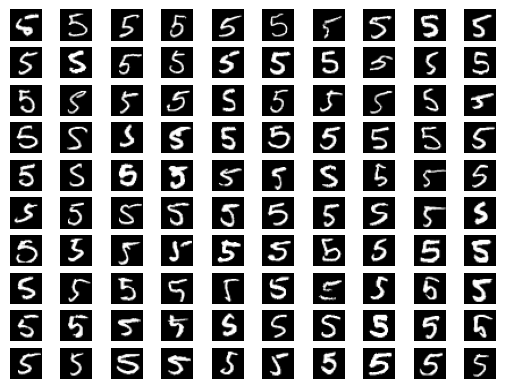

In [20]:
import matplotlib.pyplot as plt
# Display the first 100 images in the testing set whose label is 5
fives = X_test[Y_test.flatten() == 1]
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(fives[i, 1:].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

